In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [3]:
# 치킨집이 가장 많은 지역 찾기
# 그림의 크기로 많은 지역을 표현
# 치킨집 데이터 구하기
# www.localdata.kr


library("readxl")


In [4]:
ck <- read_excel("치킨집_가공.xlsx")

In [6]:
head(ck)

소재지전체주소,사업장명
<chr>,<chr>
서울특별시 서대문구 창천동 52-20번지 2층,쪼리375
서울특별시 서대문구 창천동 53-83번지 (지상1층),고향
서울특별시 서대문구 창천동 53-3번지 2층,"찬수씨, 싼술을부탁해"
서울특별시 서대문구 남가좌동 377번지 삼성아파트 상가동 101호,케리홈치킨
서울특별시 서대문구 연희동 134-28번지 지하1층,연희38애비뉴
서울특별시 서대문구 창천동 62-53번지 1층 일부,닭꼬치야


In [7]:
# 동별로 추출하여 상세 주소는 제거 substr()를 사용하여 동까지만 남기고 나머지 삭제

addr <- substr(ck$ '소재지전체주소',11,16)  #substr

In [8]:
head(addr)

[1] " 창천동 5"  " 창천동 5"  " 창천동 5"  " 남가좌동 " " 연희동 1" 
[6] " 창천동 6"

In [9]:
#숫자를 모두 삭제.
# gsub() 함수를 사용하여 제거

addr_num <- gsub("[0-9]","",addr) #gsub (찾을값, 바꿀값,어디에)

In [10]:
head(addr_num)

[1] " 창천동 "   " 창천동 "   " 창천동 "   " 남가좌동 " " 연희동 "  
[6] " 창천동 "

In [13]:
#여백 모두 삭제.
# gsub() 함수를 사용하여 제거

addr_trim  <- gsub(" ","",addr_num)

In [14]:
head(addr_trim)

[1] "창천동"   "창천동"   "창천동"   "남가좌동" "연희동"   "창천동"

In [15]:
#동별 업소 개수 확인
#변수의 개수 확인을 위해 table()함수 사용

library(dplyr)
addr_count <- addr_trim %>% table() %>% data.frame()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [16]:
head(addr_count)

,.,Freq
,<fct>,<int>
1,남가좌동,282
2,냉천동,24
3,대신동,3
4,대현동,69
5,미근동,6
6,북가좌동,155


In [21]:
install.packages("treemap")
library("treemap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



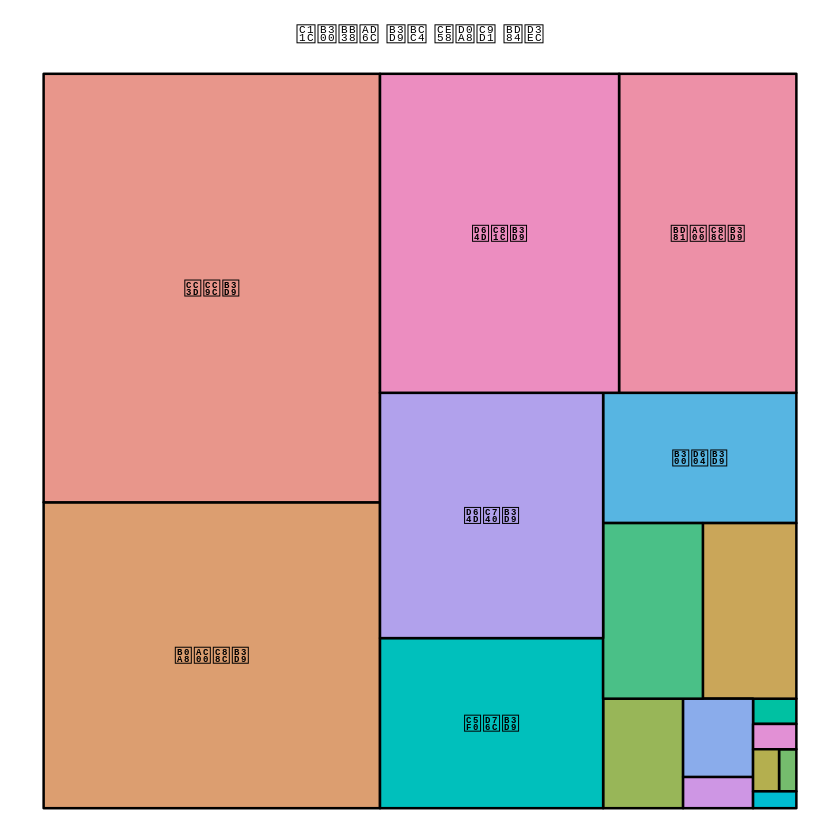

In [26]:
treemap(addr_count, index = ".", vSize="Freq", title = "서대문구 동별 치킨집 분포")
